In [1]:
#Technical Analysis Systems (Apostolos Dasilas)
#Taouktsis Xenofon (dai19312)
#Υπολογισμοί του OBV Analysis
#Δεδομένα από το [investing.com]
#Τα δεδομένα (.csv) όπως τα κατεβάζουμε απευθείας από το investing.com
#Το αρχείο θα έχει όνομα συμβόλου και μετατροπή από π.χ. ETH.csv σε ETH_md.csv
#UPDATE 111220 - v6

**On Balance Volume (OBV) Analysis**

**Εισαγωγή Functions**

In [2]:
#Βήμα 1 | Libraries Input
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.dates as mdates

#Global
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Βήμα 2 | Upload Dataset Function
def upload_dataset():
    data_upload = files.upload()
    filename = list(data_upload.keys())[0]
    filename = re.sub(".csv", "", filename)
    return filename

In [4]:
#Βήμα 3 | On Balance Volume (OBV) calculation Formula
def obv_calculation(dataset):
  conditional_values = [np.float64("nan")]
  range_value = len(dataset)
  i=0
  while i < (range_value-1):
      tmp_value = dataset['Price'][i]
      tmp_next_value = dataset['Price'][i+1]
      tmp_next_volume = dataset['Volume'][i+1]
      if tmp_next_value > tmp_value:
          conditional_values.append(tmp_next_volume)
      elif tmp_next_value < tmp_value:
          conditional_values.append(-tmp_next_volume)
      else:
          conditional_values.append(0) #όχι στο excel αυτό
      i = i + 1

  conditional_values_df = pd.DataFrame()
  conditional_values_df['IF'] = conditional_values

  tmp_obv = [dataset['Volume'][0]]
  i=0
  while i < (range_value-1):
      tmp_sum = tmp_obv[i] + conditional_values_df['IF'][i+1]
      tmp_obv.append(tmp_sum)
      i = i + 1

  obv_values_df = pd.DataFrame()
  obv_values_df['OBV'] = tmp_obv

  drop_columns = ['Open', 'High', 'Low']
  dset = dataset.drop(columns = drop_columns)

  result_values = pd.DataFrame()
  result_values = pd.concat([dset, conditional_values_df, obv_values_df], axis=1)
  result_values['OBV'] = np.float64(result_values['OBV'].apply("{0:.1f}".format))
  return result_values


In [5]:
#Βήμα 4 | Total Plot PRICE VALUE and OBV RESULTS
def total_plot_obv(dataset,obv_results):
      plt.style.use('fivethirtyeight')
      resize_figure = plt.figure(figsize=(13,5))

      symbol_name = re.sub("_md", "", filename)

      dataset = dataset.set_index(pd.DatetimeIndex(dataset['Date'].values))
      obv_results = obv_results.set_index(pd.DatetimeIndex(obv_results['Date'].values))

      #Dataset Price Plot
      plt.plot(dataset['Price'], label = symbol_name, alpha = 0.80, color = 'violet')
      plt.title('Symbol: ' + symbol_name + ' [Price History]')
      plt.ylabel('Price USD ($)')
      plt.tight_layout()
      plt.show()

      #OBV PLOT
      resize_figure = plt.figure(figsize=(13,5))
      plt.plot(obv_results['OBV'], label = symbol_name, alpha = 0.80, color = 'red')

      plt.title('OBV PLOT')
      #plt.xlabel('{} to {}'.format(start_date, end_date))
      plt.ylabel('OBV Values')
      plt.tight_layout()
      plt.show()
      return

**Απευθείας CSV to CSV_md - INVESTING.COM**

In [6]:
#Βήμα SOS
#Direct CSV to CSV_md (investing.com)
def md_csv_dataset(filename):
    chart = pd.read_csv(filename+".csv",
                        sep = ',')
    n_col = len(chart.columns)
    chart = chart.drop(chart.columns[n_col-1],axis=1)

    if len(chart.columns) < 6 :
        chart['Volume'] = 0
        id = 1
    else :
        id = 0

    chart.columns = ['Date','Price',
                    'Open','High',
                    'Low','Volume']

    #Μορφή Ημερομηνίας
    chart.Date = pd.to_datetime(chart.Date).dt.strftime('%m-%d-%Y')

    chart = chart.replace(',','', regex=True)
    chart = chart.replace('%','', regex=True)
    chart.iloc[:,1:6] = chart.iloc[:,1:6].replace('-','0', regex=True)

    chart['Date'] = chart['Date'].astype(np.datetime64)
    chart['Date'] = chart['Date'].dt.date
    chart['Price'] = chart['Price'].astype(np.float64)
    chart['Open'] = chart['Open'].astype(np.float64)
    chart['High'] = chart['High'].astype(np.float64)
    chart['Low'] = chart['Low'].astype(np.float64)

    if id!=1:
        for i in range(len(chart)):
            tmp_value = chart.iloc[i,5]
            if tmp_value != re.sub("K", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("K", "",tmp_value)) * 1000
            elif tmp_value != re.sub("M", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("M", "",tmp_value)) * 1000000
            elif  tmp_value != re.sub("B", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("B", "",tmp_value)) * 1000000000
        chart['Volume'] = chart['Volume'].astype(np.float64)
    else:
        #update 111220
        chart['Volume'] = 0 #Υπήρχε θέμα με το volume οπότε το θέτω με μηδέν ( 0 ) όταν δεν υπάρχει η στήλη από το investing.com
        #md_col = len(chart.columns)
        #chart = chart.drop(chart.columns[md_col-1],axis=1)

    chart.sort_values(by=['Date'], inplace=True, ascending=True)

    #update 081220
    chart.index = range(len(chart['Date']))

    return chart

**Αρχή Διαδικασιών OBV**

In [7]:
#Βήμα 1 | Upload .csv Dataset (.csv)
filename = upload_dataset()
filename
#Το αποτέλεσμα θα είναι π.χ. filename = "AAPL"

Saving INTC Ιστορικά Δεδομένα.csv to INTC Ιστορικά Δεδομένα.csv


'INTC Ιστορικά Δεδομένα'

In [8]:
#Βήμα 2 | Creation of Dataset (load .csv file)
#Επιλογές Υποδιαστολής
#American xlsx επιλογή decimal_select = '.' εάν το csv έχει αποθηκευτεί με ( . )
#European xlsx επιλογή decimal_select = ',' εάν το csv έχει αποθηκευτεί με ( , )

#Επιλογή Διαχωρισμού Στηλών
#European xlsx sep_select = ';' εάν το csv έχει αποθηκευτεί με ( ; )
#American xlsx sep_select = ',' εάν το csv έχει αποθηκευτεί με ( , )

#decimal_select = ',' #Υποδιαστολή
#sep_select = ';' #Διαχωρισμός Στηλών

dataset = md_csv_dataset(filename)
dataset

<ipython-input-6-052c46b199ca>:20: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  chart.Date = pd.to_datetime(chart.Date).dt.strftime('%m-%d-%Y')


Date   Price    Open    High     Low        Volume
0    2022-01-11  2830.0  2880.0  2885.0  2789.0  4.442000e+09
1    2022-01-12  2983.0  3024.0  3048.0  2952.0  3.890000e+09
2    2022-02-11  2742.0  2827.0  2885.0  2741.0  5.196000e+09
3    2022-02-12  2941.0  2917.0  2943.0  2871.0  3.155000e+09
4    2022-03-11  2739.0  2745.0  2788.0  2717.0  3.968000e+09
..          ...     ...     ...     ...     ...           ...
247  2023-12-05  2895.0  2902.0  2910.0  2872.0  2.415000e+09
248  2023-12-06  3307.0  3140.0  3330.0  3136.0  5.967000e+09
249  2023-12-07  3398.0  3369.0  3408.0  3306.0  3.728000e+09
250  2023-12-09  3886.0  3865.0  4007.0  3865.0  5.465000e+09
251  2023-12-10  3684.0  3680.0  3722.0  3639.0  2.356000e+09

[252 rows x 6 columns]

In [9]:
#Βήμα 3 | OBV total results analysis
obv_results = obv_calculation(dataset)
obv_results

Date   Price        Volume            IF           OBV
0    2022-01-11  2830.0  4.442000e+09           NaN  4.442000e+09
1    2022-01-12  2983.0  3.890000e+09  3.890000e+09  8.332000e+09
2    2022-02-11  2742.0  5.196000e+09 -5.196000e+09  3.136000e+09
3    2022-02-12  2941.0  3.155000e+09  3.155000e+09  6.291000e+09
4    2022-03-11  2739.0  3.968000e+09 -3.968000e+09  2.323000e+09
..          ...     ...           ...           ...           ...
247  2023-12-05  2895.0  2.415000e+09 -2.415000e+09  5.679800e+10
248  2023-12-06  3307.0  5.967000e+09  5.967000e+09  6.276500e+10
249  2023-12-07  3398.0  3.728000e+09  3.728000e+09  6.649300e+10
250  2023-12-09  3886.0  5.465000e+09  5.465000e+09  7.195800e+10
251  2023-12-10  3684.0  2.356000e+09 -2.356000e+09  6.960200e+10

[252 rows x 5 columns]

In [10]:
#Βήμα 4 | OBV First 30 results
obv_results.head(n=30)

Date   Price        Volume            IF           OBV
0   2022-01-11  2830.0  4.442000e+09           NaN  4.442000e+09
1   2022-01-12  2983.0  3.890000e+09  3.890000e+09  8.332000e+09
2   2022-02-11  2742.0  5.196000e+09 -5.196000e+09  3.136000e+09
3   2022-02-12  2941.0  3.155000e+09  3.155000e+09  6.291000e+09
4   2022-03-11  2739.0  3.968000e+09 -3.968000e+09  2.323000e+09
5   2022-04-11  2820.0  4.305000e+09  4.305000e+09  6.628000e+09
6   2022-05-12  2917.0  3.387000e+09  3.387000e+09  1.001500e+10
7   2022-06-12  2860.0  2.755000e+09 -2.755000e+09  7.260000e+09
8   2022-07-11  2841.0  3.439000e+09 -3.439000e+09  3.821000e+09
9   2022-07-12  2833.0  2.807000e+09 -2.807000e+09  1.014000e+09
10  2022-08-11  2848.0  3.626000e+09  3.626000e+09  4.640000e+09
11  2022-08-12  2844.0  2.837000e+09 -2.837000e+09  1.803000e+09
12  2022-09-11  2752.0  3.054000e+09 -3.054000e+09 -1.251000e+09
13  2022-09-12  2824.0  2.564000e+09  2.564000e+09  1.313000e+09
14  2022-10-11  2976.0  6.294000e+09  6.294000e+09  7.607000e+09
15  2022-10-19  2600.0  3.388000e+09 -3.388000e+09  4.219000e+09
16  2022-10-20  2608.0  3.325000e+09  3.325000e+09  7.544000e+09
17  2022-10-21  2697.0  5.306000e+09  5.306000e+09  1.285000e+10
18  2022-10-24  2718.0  4.383000e+09  4.383000e+09  1.723300e+10
19  2022-10-25  2741.0  3.221000e+09  3.221000e+09  2.045400e+10
20  2022-10-26  2721.0  3.715000e+09 -3.715000e+09  1.673900e+10
21  2022-10-27  2627.0  5.631000e+09 -5.631000e+09  1.110800e+10
22  2022-10-28  2907.0  9.170000e+09  9.170000e+09  2.027800e+10
23  2022-10-31  2843.0  5.951000e+09 -5.951000e+09  1.432700e+10
24  2022-11-11  3043.0  4.983000e+09  4.983000e+09  1.931000e+10
25  2022-11-14  3035.0  3.940000e+09 -3.940000e+09  1.537000e+10
26  2022-11-15  3071.0  4.093000e+09  4.093000e+09  1.946300e+10
27  2022-11-16  2953.0  3.558000e+09 -3.558000e+09  1.590500e+10
28  2022-11-17  2989.0  3.199000e+09  3.199000e+09  1.910400e+10
29  2022-11-18  2987.0  2.712000e+09 -2.712000e+09  1.639200e+10

In [11]:
#Βήμα 5 | OBV Last 30 results
obv_results.tail(n=30)

Date   Price        Volume            IF           OBV
222  2023-09-27  3461.0  4.419000e+09  4.419000e+09  5.585600e+10
223  2023-09-28  3518.0  3.224000e+09  3.224000e+09  5.908000e+10
224  2023-09-29  3555.0  2.876000e+09  2.876000e+09  6.195600e+10
225  2023-10-01  2944.0  2.298000e+09 -2.298000e+09  5.965800e+10
226  2023-10-02  2780.0  3.123000e+09 -3.123000e+09  5.653500e+10
227  2023-10-03  2722.0  6.519000e+09 -6.519000e+09  5.001600e+10
228  2023-10-04  3252.0  3.051000e+09  3.051000e+09  5.306700e+10
229  2023-10-05  2997.0  4.053000e+09 -4.053000e+09  4.901400e+10
230  2023-10-07  3274.0  3.623000e+09  3.623000e+09  5.263700e+10
231  2023-10-08  3468.0  2.992000e+09  2.992000e+09  5.562900e+10
232  2023-10-10  3643.0  2.393000e+09  2.393000e+09  5.802200e+10
233  2023-10-13  3597.0  2.841000e+09 -2.841000e+09  5.518100e+10
234  2023-10-16  3656.0  2.737000e+09  2.737000e+09  5.791800e+10
235  2023-10-17  3606.0  2.497000e+09 -2.497000e+09  5.542100e+10
236  2023-10-18  3564.0  2.190000e+09 -2.190000e+09  5.323100e+10
237  2023-10-19  3567.0  2.874000e+09  2.874000e+09  5.610500e+10
238  2023-11-01  2985.0  3.012000e+09 -3.012000e+09  5.309300e+10
239  2023-11-04  3235.0  2.700000e+09  2.700000e+09  5.579300e+10
240  2023-11-05  2886.0  4.714000e+09 -4.714000e+09  5.107900e+10
241  2023-11-07  3330.0  2.761000e+09  2.761000e+09  5.384000e+10
242  2023-11-08  3489.0  2.878000e+09  2.878000e+09  5.671800e+10
243  2023-11-09  3859.0  3.549000e+09  3.549000e+09  6.026700e+10
244  2023-11-10  3688.0  1.874000e+09 -1.874000e+09  5.839300e+10
245  2023-12-01  3029.0  2.887000e+09 -2.887000e+09  5.550600e+10
246  2023-12-04  3202.0  3.707000e+09  3.707000e+09  5.921300e+10
247  2023-12-05  2895.0  2.415000e+09 -2.415000e+09  5.679800e+10
248  2023-12-06  3307.0  5.967000e+09  5.967000e+09  6.276500e+10
249  2023-12-07  3398.0  3.728000e+09  3.728000e+09  6.649300e+10
250  2023-12-09  3886.0  5.465000e+09  5.465000e+09  7.195800e+10
251  2023-12-10  3684.0  2.356000e+09 -2.356000e+09  6.960200e+10

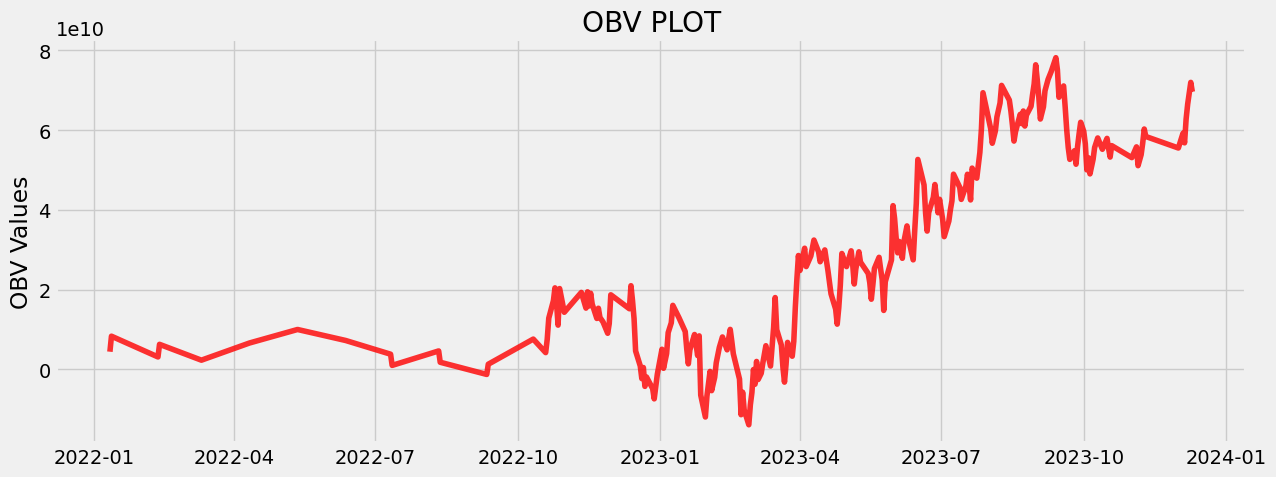

In [12]:
#Βήμα 6 | Price (close) and OBV results Plot
total_plot_obv(dataset,obv_results)